In [2]:
import os
os.getcwd()
os.chdir('/home/abc/workspace/machinelearning/dataquest')
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'geography.py~',
 'avengers.py',
 'SP500.csv',
 'hollywood_movies.csv',
 'avengers.ipynb',
 'geography.py',
 'geography',
 'avengers.py~',
 '.~lock.moviedata.csv#']

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

hollywood_movies = pd.read_csv('hollywood_movies.csv')
print (hollywood_movies.head(5))

print ("value_counts of exclude col:",hollywood_movies.exclude.value_counts())

#Drop columns
hollywood_movies = hollywood_movies.drop('exclude', axis=1)



   Year  exclude                                         Film  Lead Studio  \
0  2011      NaN                                      Average          NaN   
1  2011      NaN                             The Tree Of Life  Independant   
2  2011      NaN                            Midnight in Paris         Sony   
3  2011      NaN  Harry Potter and the Deathly Hallows Part 2  Warner Bros   
4  2011      NaN                      Twilight: Breaking Dawn  Independant   

   Critic Rating  Audience Rating      Story    Genre  \
0          52.84            61.42        NaN      NaN   
1          84.00            61.00  Discovery    Drama   
2          93.00            84.00       Love  Romance   
3          96.00            92.00    Rivalry  Fantasy   
4          26.00            68.00       Love  Romance   

   Opening Weekend Theaters  Opening Weekend per Cinema  Domestic Gross  \
0                   2810.31                     8764.92           61.33   
1                      4.00           

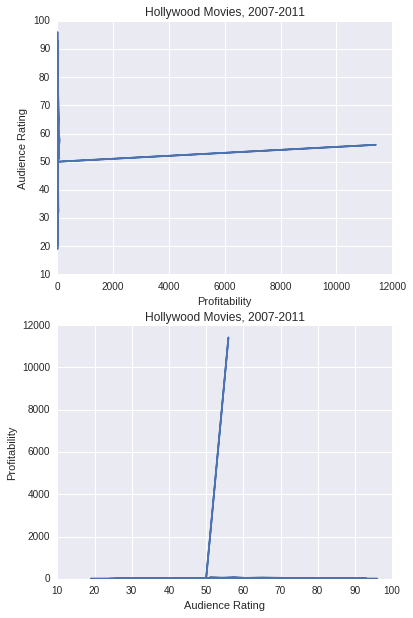

In [10]:
fig = plt.figure(figsize=(6,10))

ax1=fig.add_subplot(211)
ax1.plot(hollywood_movies['Profitability'],hollywood_movies['Audience Rating'])
ax1.set_xlabel('Profitability')
ax1.set_ylabel('Audience Rating')
ax1.set_title('Hollywood Movies, 2007-2011')

ax2 = fig.add_subplot(212)
ax2.plot(hollywood_movies['Audience Rating'],hollywood_movies['Profitability'])
ax2.set_ylabel('Profitability')
ax2.set_xlabel('Audience Rating')
ax2.set_title('Hollywood Movies, 2007-2011')

plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaf9a78208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ffaf97e0630>]], dtype=object)

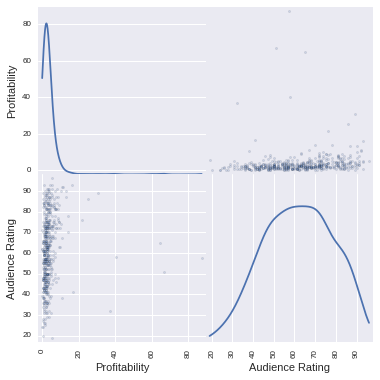

In [21]:
normal_movies = hollywood_movies[hollywood_movies['Film'] != 'Paranormal Activity']

from pandas.tools.plotting import scatter_matrix


scatter_matrix(normal_movies[['Profitability','Audience Rating']], alpha=0.2, figsize=(6,6), diagonal='kde')

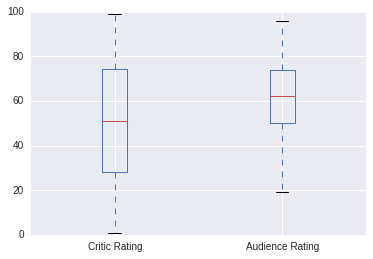

In [23]:
normal_movies[['Critic Rating','Audience Rating']].plot(kind='box')

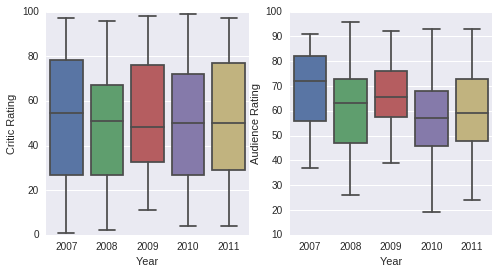

In [31]:
normal_movies = normal_movies.sort_values(by='Year')

fig = plt.figure(figsize=(8,4))
ax1= fig.add_subplot(1,2,1)
sns.boxplot(x=normal_movies['Year'],y=normal_movies['Critic Rating'], ax=ax1)

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x=normal_movies['Year'],y=normal_movies['Audience Rating'], ax=ax2)


True     447
False     69
Name: Profitable, dtype: int64


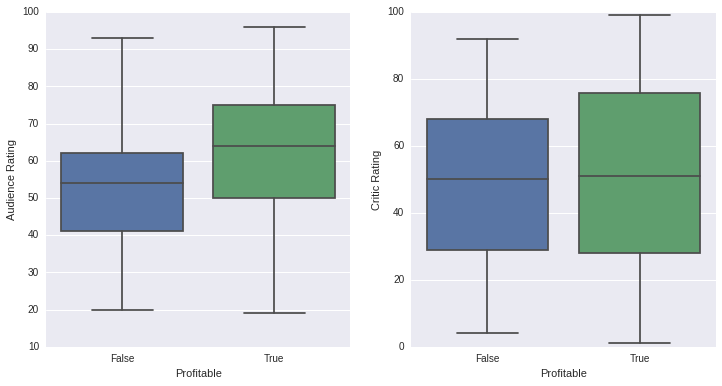

In [32]:
def is_profitable(row):
    if row["Profitability"] <= 1.0:
        return False
    return True
normal_movies["Profitable"] = normal_movies.apply(is_profitable, axis=1)
print(normal_movies["Profitable"].value_counts())

figure = plt.figure(figsize=(12,6))
ax1 = figure.add_subplot(1,2,1)
sns.boxplot(x=normal_movies['Profitable'],y=normal_movies['Audience Rating'], ax=ax1)


ax2 = figure.add_subplot(1,2,2)
sns.boxplot(x=normal_movies['Profitable'],y=normal_movies['Critic Rating'], ax=ax2)

plt.show()
